In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import astropy.units as u
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)

from astropy.coordinates import SkyCoord, search_around_sky
from astropy.table import Table

from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
first = Table.read('../../first_14dec17.fits.gz')
pred = pd.read_csv('Predicting_radio_ccomplete.csv')
pred = pd.read_csv('Predicting_radio_complete_whost_worder.csv')

In [3]:
first_sky = SkyCoord(ra=first['RA'], dec=first['DEC'])
pred_sky  = SkyCoord(ra=pred['pred_ra'].values*u.deg, dec=pred['pred_dec'].values*u.deg)
fake_sky  = SkyCoord(ra=pred['fake_ra'].values*u.deg, dec=pred['fake_dec'].values*u.deg)

In [4]:
seplimit = 5*u.arcsec
pred_res = search_around_sky(first_sky, pred_sky, seplimit=seplimit)
fake_res = search_around_sky(first_sky, fake_sky, seplimit=seplimit)

In [5]:
pred.loc[pred_res[1],'match_ra'] = first[pred_res[0]]['RA']
pred.loc[pred_res[1],'match_dec'] = first[pred_res[0]]['DEC']

pred.loc[fake_res[1],'fake_match_ra'] = first[fake_res[0]]['RA']
pred.loc[fake_res[1],'fake_match_dec'] = first[fake_res[0]]['DEC']

In [6]:
pred_match = SkyCoord(ra=pred['match_ra'].values*u.deg, dec=pred['match_dec'].values*u.deg)
fake_match = SkyCoord(ra=pred['fake_match_ra'].values*u.deg, dec=pred['fake_match_dec'].values*u.deg)

/Users/gal16b/miniconda3/envs/pink_e3/lib/python3.7/site-packages/astropy/coordinates/angles.py:642: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/gal16b/miniconda3/envs/pink_e3/lib/python3.7/site-packages/astropy/coordinates/angles.py:642: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/gal16b/miniconda3/envs/pink_e3/lib/python3.7/site-packages/astropy/coordinates/angles.py:529: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/gal16b/miniconda3/envs/pink_e3/lib/python3.7/site-packages/astropy/coordinates/angles.py:529: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):


In [7]:
res = pred_match.separation(pred_sky)
fakeres = fake_match.separation(fake_sky)

/Users/gal16b/miniconda3/envs/pink_e3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


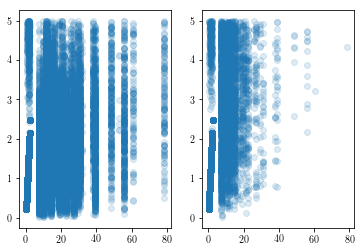

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.scatter((pred['pred_sep'].values*u.deg).to(u.arcsec), res.to(u.arcsec), alpha=0.15)
ax2.scatter((pred['fake_sep'].values*u.deg).to(u.arcsec), fakeres.to(u.arcsec), alpha=0.15)

fig.show()


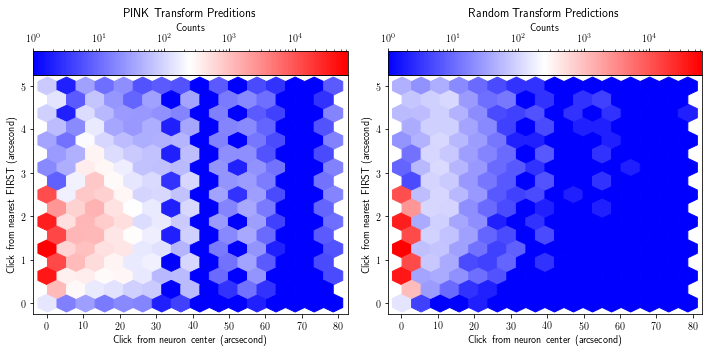

In [9]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('top', size='10%')

im = ax1.hexbin((pred['pred_sep'].values*u.deg).to(u.arcsec), res.to(u.arcsec), gridsize=15, 
                cmap='bwr', bins='log')#, mincnt=1)
ax1.set(xlabel='Click from neuron center (arcsecond)',
        ylabel='Click from nearest FIRST (arcsecond)')
fig.colorbar(im, cax=cax1, label='Counts', orientation='horizontal')
cax1.xaxis.set_ticks_position('top')
cax1.xaxis.set_label_position('top')
cax1.set(title='PINK Transform Preditions')

divider = make_axes_locatable(ax2)
cax2 = divider.append_axes('top', size='10%')

im = ax2.hexbin((pred['fake_sep'].values*u.deg).to(u.arcsec), fakeres.to(u.arcsec), gridsize=15,
                cmap='bwr', bins='log')#, mincnt=1)
ax2.set(xlabel='Click from neuron center (arcsecond)',
        ylabel='Click from nearest FIRST (arcsecond)')
fig.colorbar(im, cax=cax2, label='Counts', orientation='horizontal')
cax2.xaxis.set_ticks_position('top')
cax2.xaxis.set_label_position('top')
cax2.set(title='Random Transform Predictions')

fig.tight_layout()
fig.savefig('Images/Predicted_Position_FIRST_HexBin.png')

/Users/gal16b/miniconda3/envs/pink_e3/lib/python3.7/site-packages/numpy/lib/histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/gal16b/miniconda3/envs/pink_e3/lib/python3.7/site-packages/numpy/lib/histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


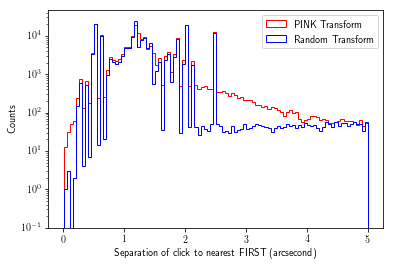

In [10]:
fig, ax = plt.subplots(1,1)

ax.hist(res.to(u.arcsec).value, histtype='step', color='red', bins=100, log=True, label='PINK Transform')
ax.hist(fakeres.to(u.arcsec).value, histtype='step', color='blue', bins=100, log=True, label='Random Transform')
ax.set(xlabel ='Separation of click to nearest FIRST (arcsecond)',
       ylabel ='Counts')
ax.legend()
fig.savefig('Images/Predicted_Positions_Separation_Hist.png')

/Users/gal16b/miniconda3/envs/pink_e3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
/Users/gal16b/miniconda3/envs/pink_e3/lib/python3.7/site-packages/numpy/lib/histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/gal16b/miniconda3/envs/pink_e3/lib/python3.7/site-packages/numpy/lib/histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


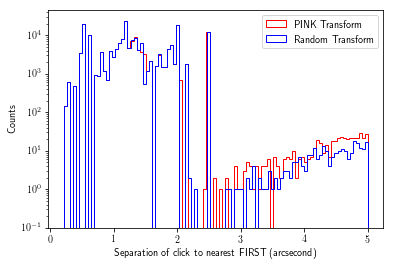

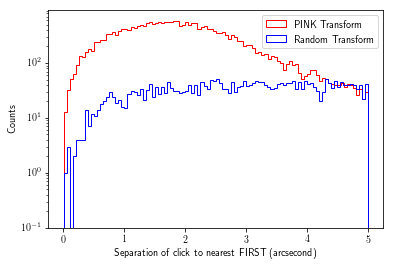

In [11]:
for i in range(pred['click_count'].max()+1):
    mask = pred['click_count'] == i
    
    fig, ax = plt.subplots(1,1)

    ax.hist(res.to(u.arcsec).value[mask], histtype='step', color='red', bins=100, log=True, label='PINK Transform')
    ax.hist(fakeres.to(u.arcsec).value[mask], histtype='step', color='blue', bins=100, log=True, label='Random Transform')
    ax.set(xlabel ='Separation of click to nearest FIRST (arcsecond)',
           ylabel ='Counts')
    ax.legend()
    
    fig.show()

('(0, 5)', '(0, 9)', '(1, 5)', '(10, 0)', '(10, 1)', '(10, 10)', '(10, 11)', '(10, 2)', '(10, 3)', '(11, 0)', '(11, 1)', '(11, 10)', '(11, 11)', '(11, 2)', '(11, 3)', '(11, 4)', '(11, 5)', '(11, 9)', '(2, 2)', '(4, 3)', '(6, 0)', '(6, 1)', '(7, 0)', '(7, 1)', '(7, 2)', '(7, 3)', '(8, 0)', '(8, 11)', '(8, 3)', '(9, 0)', '(9, 1)', '(9, 11)', '(9, 2)', '(9, 4)')


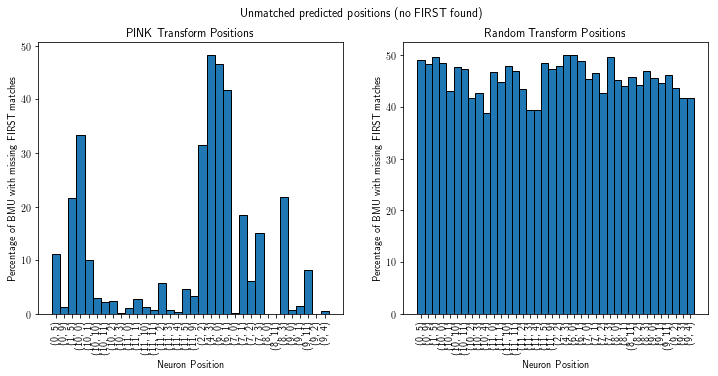

In [12]:
from collections import Counter

cr = Counter(pred.iloc[np.isnan(res)]['bmu_pos'])
cf = Counter(pred.iloc[np.isnan(fakeres)]['bmu_pos'])
d = Counter(pred['bmu_pos'])

# for k in c.keys():
#     print(f"{k}\t {c[k]}\t  {d[k]}\t {c[k]/d[k]*100:.2f}")
    
labels, cnt = zip(*sorted(cr.items(), key=lambda x:x[0]))
print(labels)

indexes = np.arange(len(labels))

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

labels, cnt = zip(*sorted(cr.items(), key=lambda x:x[0]))
indexes = np.arange(len(labels))
real_cnt = np.array([d[k] for k in labels])

# ax1.bar(indexes, real_cnt, 1, edgecolor='black', color='red')
ax1.bar(indexes, np.array(cnt)/real_cnt*100, 1, edgecolor='black')
ax1.set_xticks(indexes)
ax1.set_xticklabels(labels, rotation=90)
ax1.set(title='PINK Transform Positions', xlabel='Neuron Position',
       ylabel='Percentage of BMU with missing FIRST matches')

labels, cnt = zip(*sorted(cf.items(), key=lambda x:x[0]))
indexes = np.arange(len(labels))
real_cnt = [d[k] for k in labels]

# ax2.bar(indexes, real_cnt, 1, edgecolor='black', color='red')
ax2.bar(indexes, np.array(cnt)/real_cnt*100, 1, edgecolor='black')
ax2.set_xticks(indexes)
ax2.set_xticklabels(labels, rotation=90)
ax2.set(title='Random Transform Positions', xlabel='Neuron Position',
       ylabel='Percentage of BMU with missing FIRST matches')

fig.suptitle('Unmatched predicted positions (no FIRST found)')
fig.savefig('Images/Predicted_Unmatched_Positions.png')
# fig.show()

('(0, 5)', '(0, 9)', '(1, 5)', '(10, 0)', '(10, 1)', '(10, 10)', '(10, 11)', '(10, 2)', '(10, 3)', '(11, 0)', '(11, 1)', '(11, 10)', '(11, 11)', '(11, 2)', '(11, 3)', '(11, 4)', '(11, 5)', '(11, 9)', '(2, 2)', '(4, 3)', '(6, 0)', '(6, 1)', '(7, 0)', '(7, 1)', '(7, 2)', '(7, 3)', '(8, 0)', '(8, 11)', '(8, 3)', '(9, 0)', '(9, 1)', '(9, 11)', '(9, 2)', '(9, 4)')


/Users/gal16b/miniconda3/envs/pink_e3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


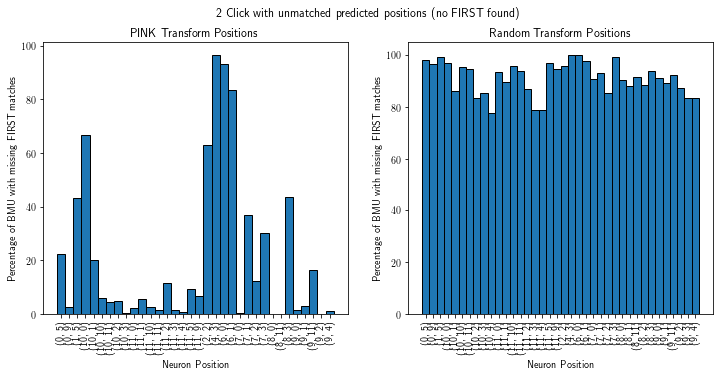

In [13]:
for i in range(pred['click_count'].max()+1):

    mask = pred['click_count'] == i
    cr = Counter(pred.iloc[(np.isnan(res)) & (mask.values)]['bmu_pos'])
    cf = Counter(pred.iloc[(np.isnan(fakeres)) & (mask.values)]['bmu_pos'])
    d = Counter(pred['bmu_pos'].values[mask])

    if len(cr) == 0:
        continue
        
    labels, cnt = zip(*sorted(cr.items(), key=lambda x:x[0]))
    print(labels)

    indexes = np.arange(len(labels))

    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

    labels, cnt = zip(*sorted(cr.items(), key=lambda x:x[0]))
    indexes = np.arange(len(labels))
    real_cnt = np.array([d[k] for k in labels])

    # ax1.bar(indexes, real_cnt, 1, edgecolor='black', color='red')
    ax1.bar(indexes, np.array(cnt)/real_cnt*100, 1, edgecolor='black')
    ax1.set_xticks(indexes)
    ax1.set_xticklabels(labels, rotation=90)
    ax1.set(title='PINK Transform Positions', xlabel='Neuron Position',
           ylabel='Percentage of BMU with missing FIRST matches')

    labels, cnt = zip(*sorted(cf.items(), key=lambda x:x[0]))
    indexes = np.arange(len(labels))
    real_cnt = [d[k] for k in labels]

    # ax2.bar(indexes, real_cnt, 1, edgecolor='black', color='red')
    ax2.bar(indexes, np.array(cnt)/real_cnt*100, 1, edgecolor='black')
    ax2.set_xticks(indexes)
    ax2.set_xticklabels(labels, rotation=90)
    ax2.set(title='Random Transform Positions', xlabel='Neuron Position',
           ylabel='Percentage of BMU with missing FIRST matches')

    fig.suptitle(f'{i+1} Click with unmatched predicted positions (no FIRST found)')
    fig.show()

/Users/gal16b/miniconda3/envs/pink_e3/lib/python3.7/site-packages/numpy/lib/histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/gal16b/miniconda3/envs/pink_e3/lib/python3.7/site-packages/numpy/lib/histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


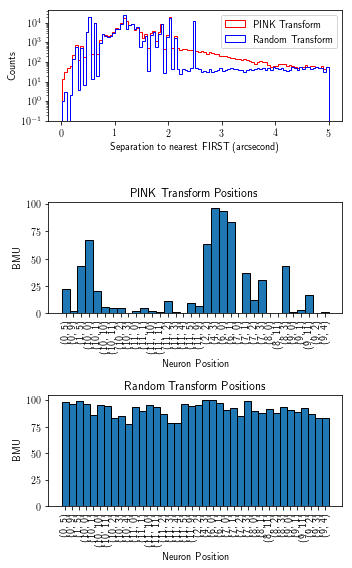

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(5,8))

ax1.hist(res.to(u.arcsec).value, histtype='step', color='red', bins=100, log=True, label='PINK Transform')
ax1.hist(fakeres.to(u.arcsec).value, histtype='step', color='blue', bins=100, log=True, label='Random Transform')
ax1.set(xlabel ='Separation to nearest FIRST (arcsecond)',
        ylabel ='Counts')
ax1.legend()

labels, cnt = zip(*sorted(cr.items(), key=lambda x:x[0]))

indexes = np.arange(len(labels))

labels, cnt = zip(*sorted(cr.items(), key=lambda x:x[0]))
indexes = np.arange(len(labels))
real_cnt = np.array([d[k] for k in labels])

# ax1.bar(indexes, real_cnt, 1, edgecolor='black', color='red')
ax2.bar(indexes, np.array(cnt)/real_cnt*100, 1, edgecolor='black')
ax2.set_xticks(indexes)
ax2.set_xticklabels(labels, rotation=90)
ax2.set(title='PINK Transform Positions', xlabel='Neuron Position',
       ylabel='BMU % Missing')

labels, cnt = zip(*sorted(cf.items(), key=lambda x:x[0]))
indexes = np.arange(len(labels))
real_cnt = [d[k] for k in labels]

# ax2.bar(indexes, real_cnt, 1, edgecolor='black', color='red')
ax3.bar(indexes, np.array(cnt)/real_cnt*100, 1, edgecolor='black')
ax3.set_xticks(indexes)
ax3.set_xticklabels(labels, rotation=90)
ax3.set(title='Random Transform Positions', xlabel='Neuron Position',
        ylabel='BMU % Missing')

fig.tight_layout()
# fig.show()
fig.savefig('Images/Missing_First_Matching.pdf')

/Users/gal16b/miniconda3/envs/pink_e3/lib/python3.7/site-packages/numpy/lib/histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/gal16b/miniconda3/envs/pink_e3/lib/python3.7/site-packages/numpy/lib/histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


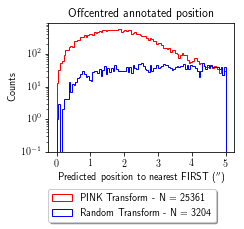

In [37]:
i = 1
mask = pred['click_count'] == i

fig, ax = plt.subplots(1,1, figsize=(3.5,3.5))

good_no = np.sum(np.isfinite(res.to(u.arcsec).value[mask]))
bad_no =  np.sum(np.isfinite(fakeres.to(u.arcsec).value[mask]))

ax.hist(res.to(u.arcsec).value[mask], histtype='step', color='red', bins=100, log=True, label=f'PINK Transform - N = {good_no}')
ax.hist(fakeres.to(u.arcsec).value[mask], histtype='step', color='blue', bins=100, log=True, label=f'Random Transform - N = {bad_no}')
ax.set(xlabel ="Predicted position to nearest FIRST ($''$)",
       ylabel ='Counts',
       title='Offcentred annotated position')

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.45, -0.25),
          fancybox=True, shadow=True, ncol=1)
fig.tight_layout()
fig.savefig(f"Figure_{i}_Mismatch_Click_Dist.pdf")

/Users/gal16b/miniconda3/envs/pink_e3/lib/python3.7/site-packages/numpy/lib/histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/gal16b/miniconda3/envs/pink_e3/lib/python3.7/site-packages/numpy/lib/histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/gal16b/miniconda3/envs/pink_e3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


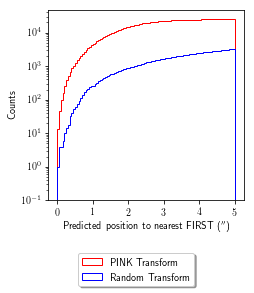

In [18]:
i = 1
mask = pred['click_count'] == i

fig, ax = plt.subplots(1,1, figsize=(3.5,3.5))

ax.hist(res.to(u.arcsec).value[mask], histtype='step', color='red', 
        bins=100, log=True, label='PINK Transform', cumulative=True)
ax.hist(fakeres.to(u.arcsec).value[mask], histtype='step', color='blue', bins=100, 
        log=True, label='Random Transform', cumulative=True)
ax.set(xlabel ="Predicted position to nearest FIRST ($''$)",
       ylabel ='Counts')

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.45, -0.25),
          fancybox=True, shadow=True, ncol=1)
fig.show()

In [17]:
from scipy.stats import ks_2samp
for i in range(pred['click_count'].max()+1):
    mask = pred['click_count'] == i

    g = res.to(u.arcsec).value[mask]
    b = fakeres.to(u.arcsec).value[mask]
    
    print(ks_2samp(g, b))

Ks_2sampResult(statistic=0.06190351058655143, pvalue=2.4992128897958407e-298)
Ks_2sampResult(statistic=0.7874445823727612, pvalue=0.0)


In [27]:
from collections import Counter
from ast import literal_eval

cr = Counter(pred.iloc[np.isnan(res)]['bmu_pos'])
cf = Counter(pred.iloc[np.isnan(fakeres)]['bmu_pos'])
d = Counter(pred['bmu_pos'])

rows = []

for k in cf.keys():
    rows.append({'Key':literal_eval(k), 'PINK':cr[k], 'Fake': cf[k], 'Total':d[k]})

from pandas import DataFrame

ndf = DataFrame(rows)

In [28]:
ndf = ndf[['Key', 'PINK', 'Fake', 'Total']].sort_values(by='Key')

In [31]:
print(ndf.to_latex(index=False))

\begin{tabular}{lrrr}
\toprule
      Key &  PINK &  Fake &  Total \\
\midrule
   (0, 5) &    76 &   336 &    684 \\
   (0, 9) &    18 &   665 &   1376 \\
   (1, 5) &    72 &   166 &    334 \\
   (2, 2) &   443 &   673 &   1404 \\
   (4, 3) &   194 &   201 &    402 \\
   (6, 0) &   230 &   247 &    494 \\
   (6, 1) &   439 &   513 &   1050 \\
   (7, 0) &     4 &   837 &   1842 \\
   (7, 1) &   141 &   356 &    766 \\
   (7, 2) &    74 &   519 &   1218 \\
   (7, 3) &    57 &   187 &    376 \\
   (8, 0) &     1 &   840 &   1862 \\
   (8, 1) &     0 &   997 &   2266 \\
   (8, 2) &     0 &  1064 &   2406 \\
   (8, 3) &   274 &   588 &   1252 \\
  (8, 11) &     1 &   863 &   1888 \\
   (9, 0) &     9 &   507 &   1112 \\
   (9, 1) &    21 &   654 &   1468 \\
   (9, 2) &     1 &  1023 &   2342 \\
   (9, 3) &     0 &  1254 &   3008 \\
   (9, 4) &     2 &   145 &    348 \\
  (9, 11) &    54 &   304 &    658 \\
  (10, 0) &   155 &   225 &    464 \\
  (10, 1) &    59 &   252 &    584 \\
  (10, 2) 